# Based On https://keras.io/examples/generative/vae/

In [1]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent.parent
os.chdir(home_dir)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from src.utils import get_optimizer, SAVED_CLASSIFIER_PATH_MNIST, keras_dataset_image_preprocessing, DENSE_LAYER_NAME

from src.vae import ClaDecVAE, RefVAE

tf.random.set_seed(1234)

(train_images, train_labels_c), (test_images, test_labels_c) = keras_dataset_image_preprocessing(
    keras.datasets.mnist)
# get the trained model and check accuracy on test data for later reference
classifier = keras.models.load_model(SAVED_CLASSIFIER_PATH_MNIST)

2022-07-10 20:10:53.612317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 20:10:53.654418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 20:10:53.654642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 20:10:53.655728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
classifier.evaluate(test_images, test_labels_c)
classifier.summary()

2022-07-10 20:10:55.916094: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


313/313 [==============================] - 3s 4ms/step - loss: 0.0414 - categorical_accuracy: 0.9905
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)   

In [4]:
batch_size = 128
epochs = 30
images = np.concatenate([train_images, test_images], axis=0)
labels = np.concatenate([train_labels_c, test_labels_c], axis=0)

In [5]:
alpha = 0.01
latent_dim = 2
claDec = ClaDecVAE(classifier, DENSE_LAYER_NAME, alpha, latent_dim)
claDec.compile(optimizer=keras.optimizers.Adam())  # get_optimizer()

In [6]:
# claDec.fit(train_images, train_labels_c, epochs=10)
# alpha = 0.01
# lr = 0.001
# after 10 epochs loss: 4.0776 - reconstruction_loss: 0.0670 - kl_loss: 3.7966 - classification_loss: 2.2015
claDec.fit(images, labels, epochs=epochs, batch_size=batch_size)
# batch_size 128
# after 30 epochs loss: 13.7896 - reconstruction_loss: 0.0663 - kl_loss: 13.7667 - classification_loss: 2.0965

Epoch 1/30


2022-07-10 20:10:57.975062: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 219520000 exceeds 10% of free system memory.
2022-07-10 20:10:58.219539: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 219520000 exceeds 10% of free system memory.


547/547 [==============================] - 28s 48ms/step - loss: 4336148.1353 - reconstruction_loss: 0.0769 - kl_loss: 1562900.6250 - classification_loss: 5.3366
Epoch 2/30
547/547 [==============================] - 26s 48ms/step - loss: 31986.3257 - reconstruction_loss: 0.0676 - kl_loss: 49710.0547 - classification_loss: 2.1479
Epoch 3/30
547/547 [==============================] - 27s 49ms/step - loss: 21373.8372 - reconstruction_loss: 0.0673 - kl_loss: 27492.8066 - classification_loss: 2.0987
Epoch 4/30
547/547 [==============================] - 32s 58ms/step - loss: 28500.1464 - reconstruction_loss: 0.0669 - kl_loss: 17353.4629 - classification_loss: 2.0638
Epoch 5/30
547/547 [==============================] - 36s 65ms/step - loss: 18198.8111 - reconstruction_loss: 0.0663 - kl_loss: 11754.2666 - classification_loss: 1.8986
Epoch 6/30
547/547 [==============================] - 37s 68ms/step - loss: 7032.4873 - reconstruction_loss: 0.0659 - kl_loss: 8102.8394 - classification_loss: 1.

In [7]:
refvae = RefVAE(claDec)
refvae.compile(optimizer=keras.optimizers.Adam())
refvae.fit(images, epochs=epochs, batch_size=batch_size)

2022-07-10 20:35:22.003536: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 219520000 exceeds 10% of free system memory.
2022-07-10 20:35:22.300051: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 219520000 exceeds 10% of free system memory.


Epoch 1/30
547/547 [==============================] - 26s 45ms/step - loss: 251.6340 - reconstruction_loss: 193.6355 - kl_loss: 4.3010
Epoch 2/30
547/547 [==============================] - 32s 59ms/step - loss: 164.5748 - reconstruction_loss: 156.6617 - kl_loss: 5.2056
Epoch 3/30
547/547 [==============================] - 50s 91ms/step - loss: 156.7380 - reconstruction_loss: 150.2570 - kl_loss: 5.6609
Epoch 4/30
547/547 [==============================] - 50s 91ms/step - loss: 153.8044 - reconstruction_loss: 147.4780 - kl_loss: 5.8530
Epoch 5/30
547/547 [==============================] - 49s 90ms/step - loss: 151.4201 - reconstruction_loss: 145.6305 - kl_loss: 5.9722
Epoch 6/30
547/547 [==============================] - 50s 91ms/step - loss: 150.5118 - reconstruction_loss: 144.2965 - kl_loss: 6.0582
Epoch 7/30
547/547 [==============================] - 50s 91ms/step - loss: 149.6568 - reconstruction_loss: 143.3530 - kl_loss: 6.1233
Epoch 8/30
547/547 [==============================] - 4

In [8]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=30):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
            i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


def plot_label_clusters(vae, data, classes):
    # display a 2D plot of the classes in the latent space
    z_mean, z_log_var, reconstruction = vae(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=classes)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


test_labels = np.argmax(test_labels_c, axis=1)
train_labels = np.argmax(train_labels_c, axis=1)
encoding = ["T-Shirt (Top)", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

1/1 [==============================] - 0s 16ms/step


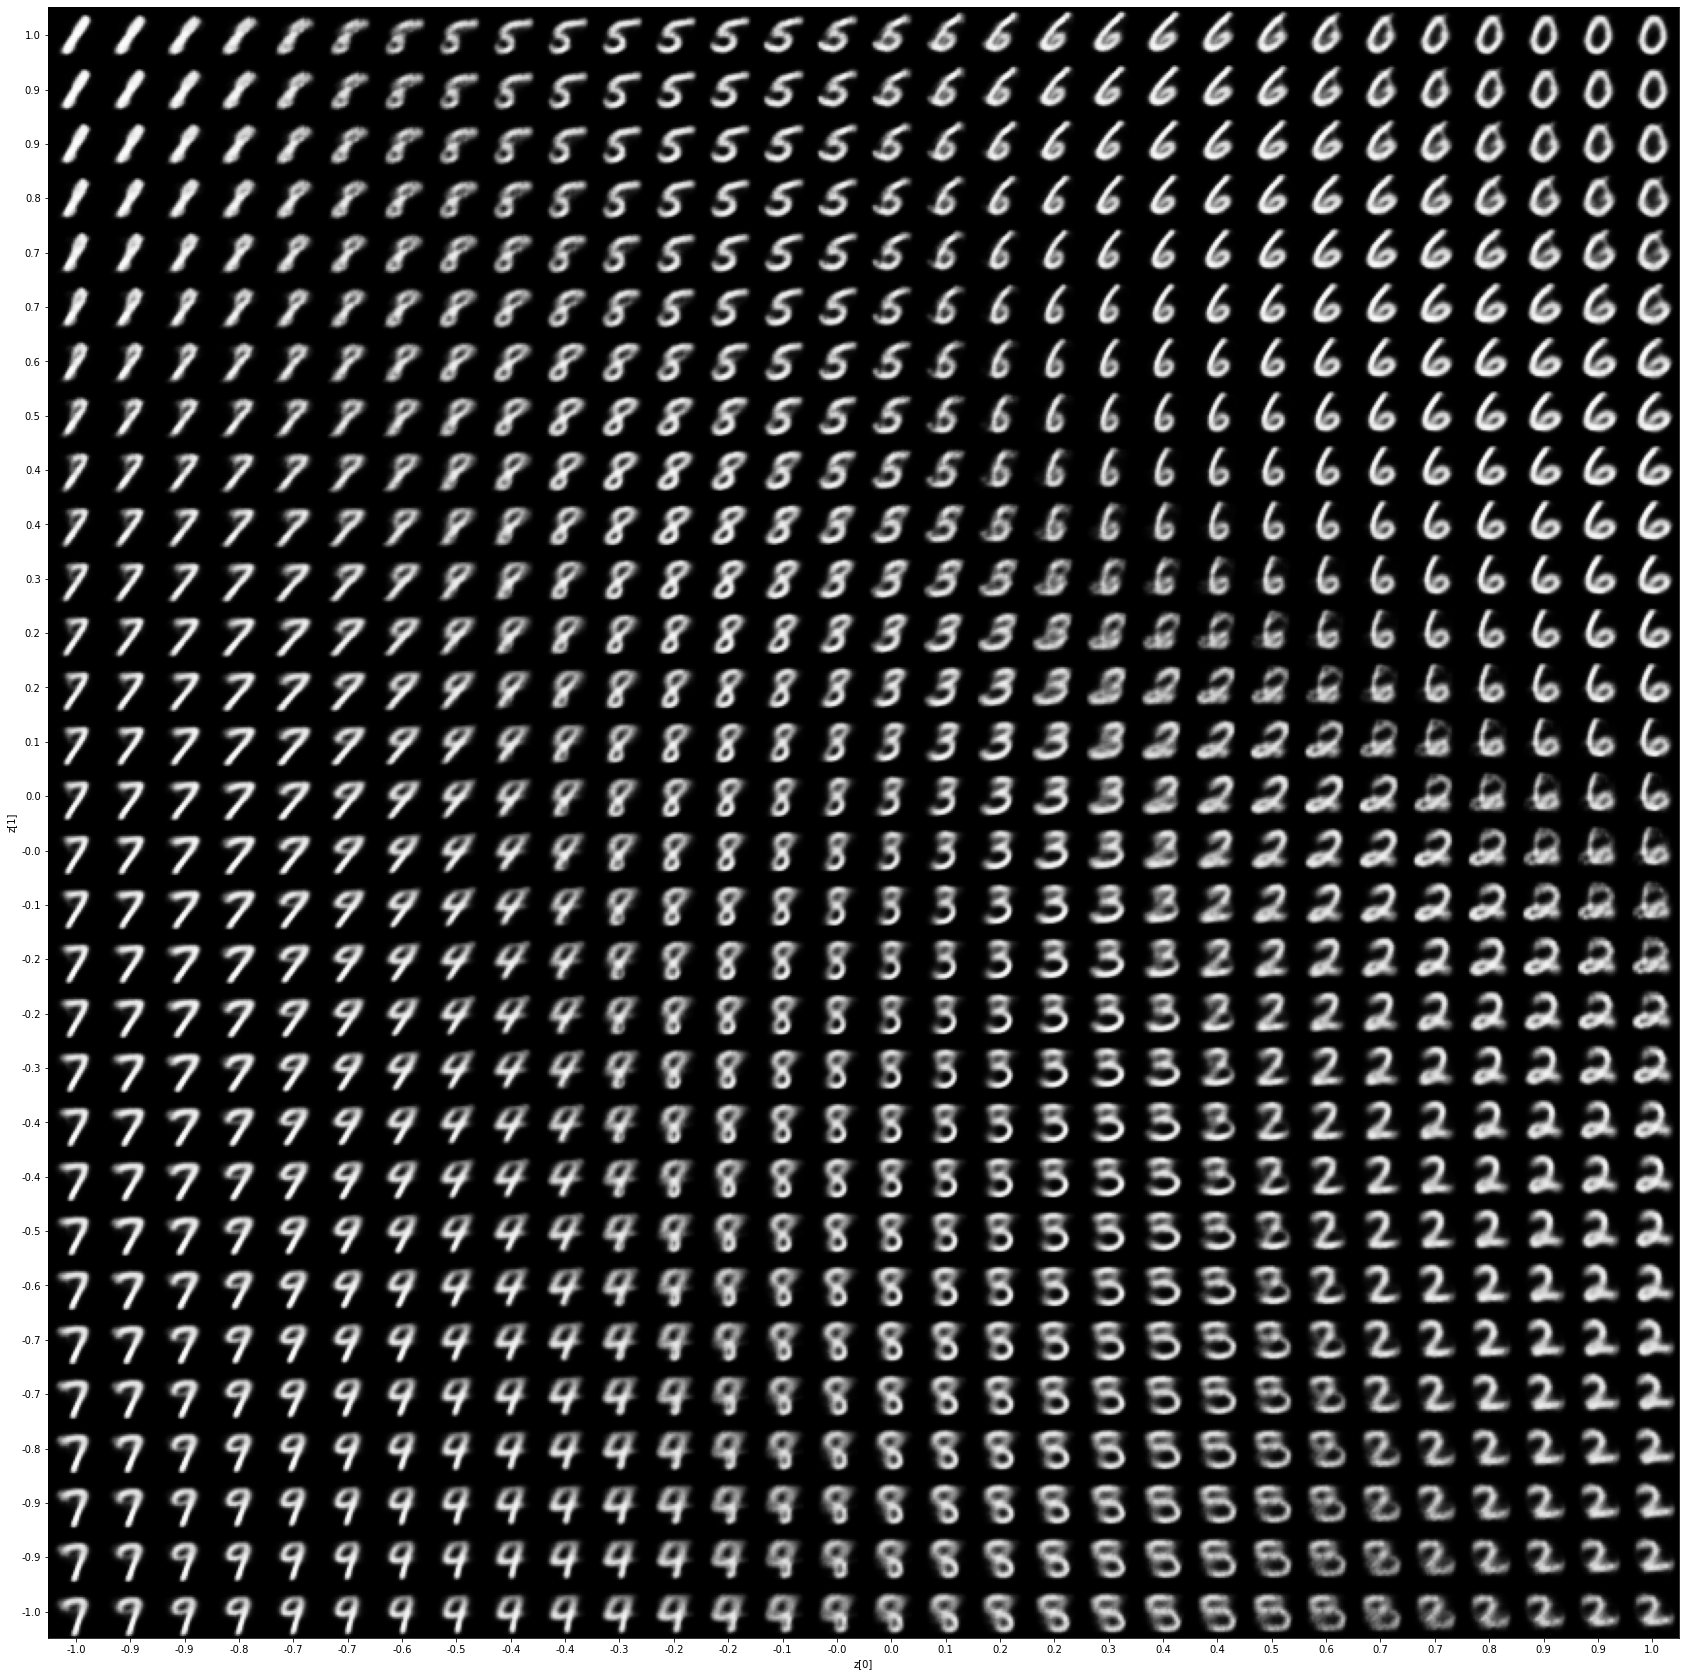

In [9]:
plot_latent_space(refvae)

1/1 [==============================] - 0s 29ms/step


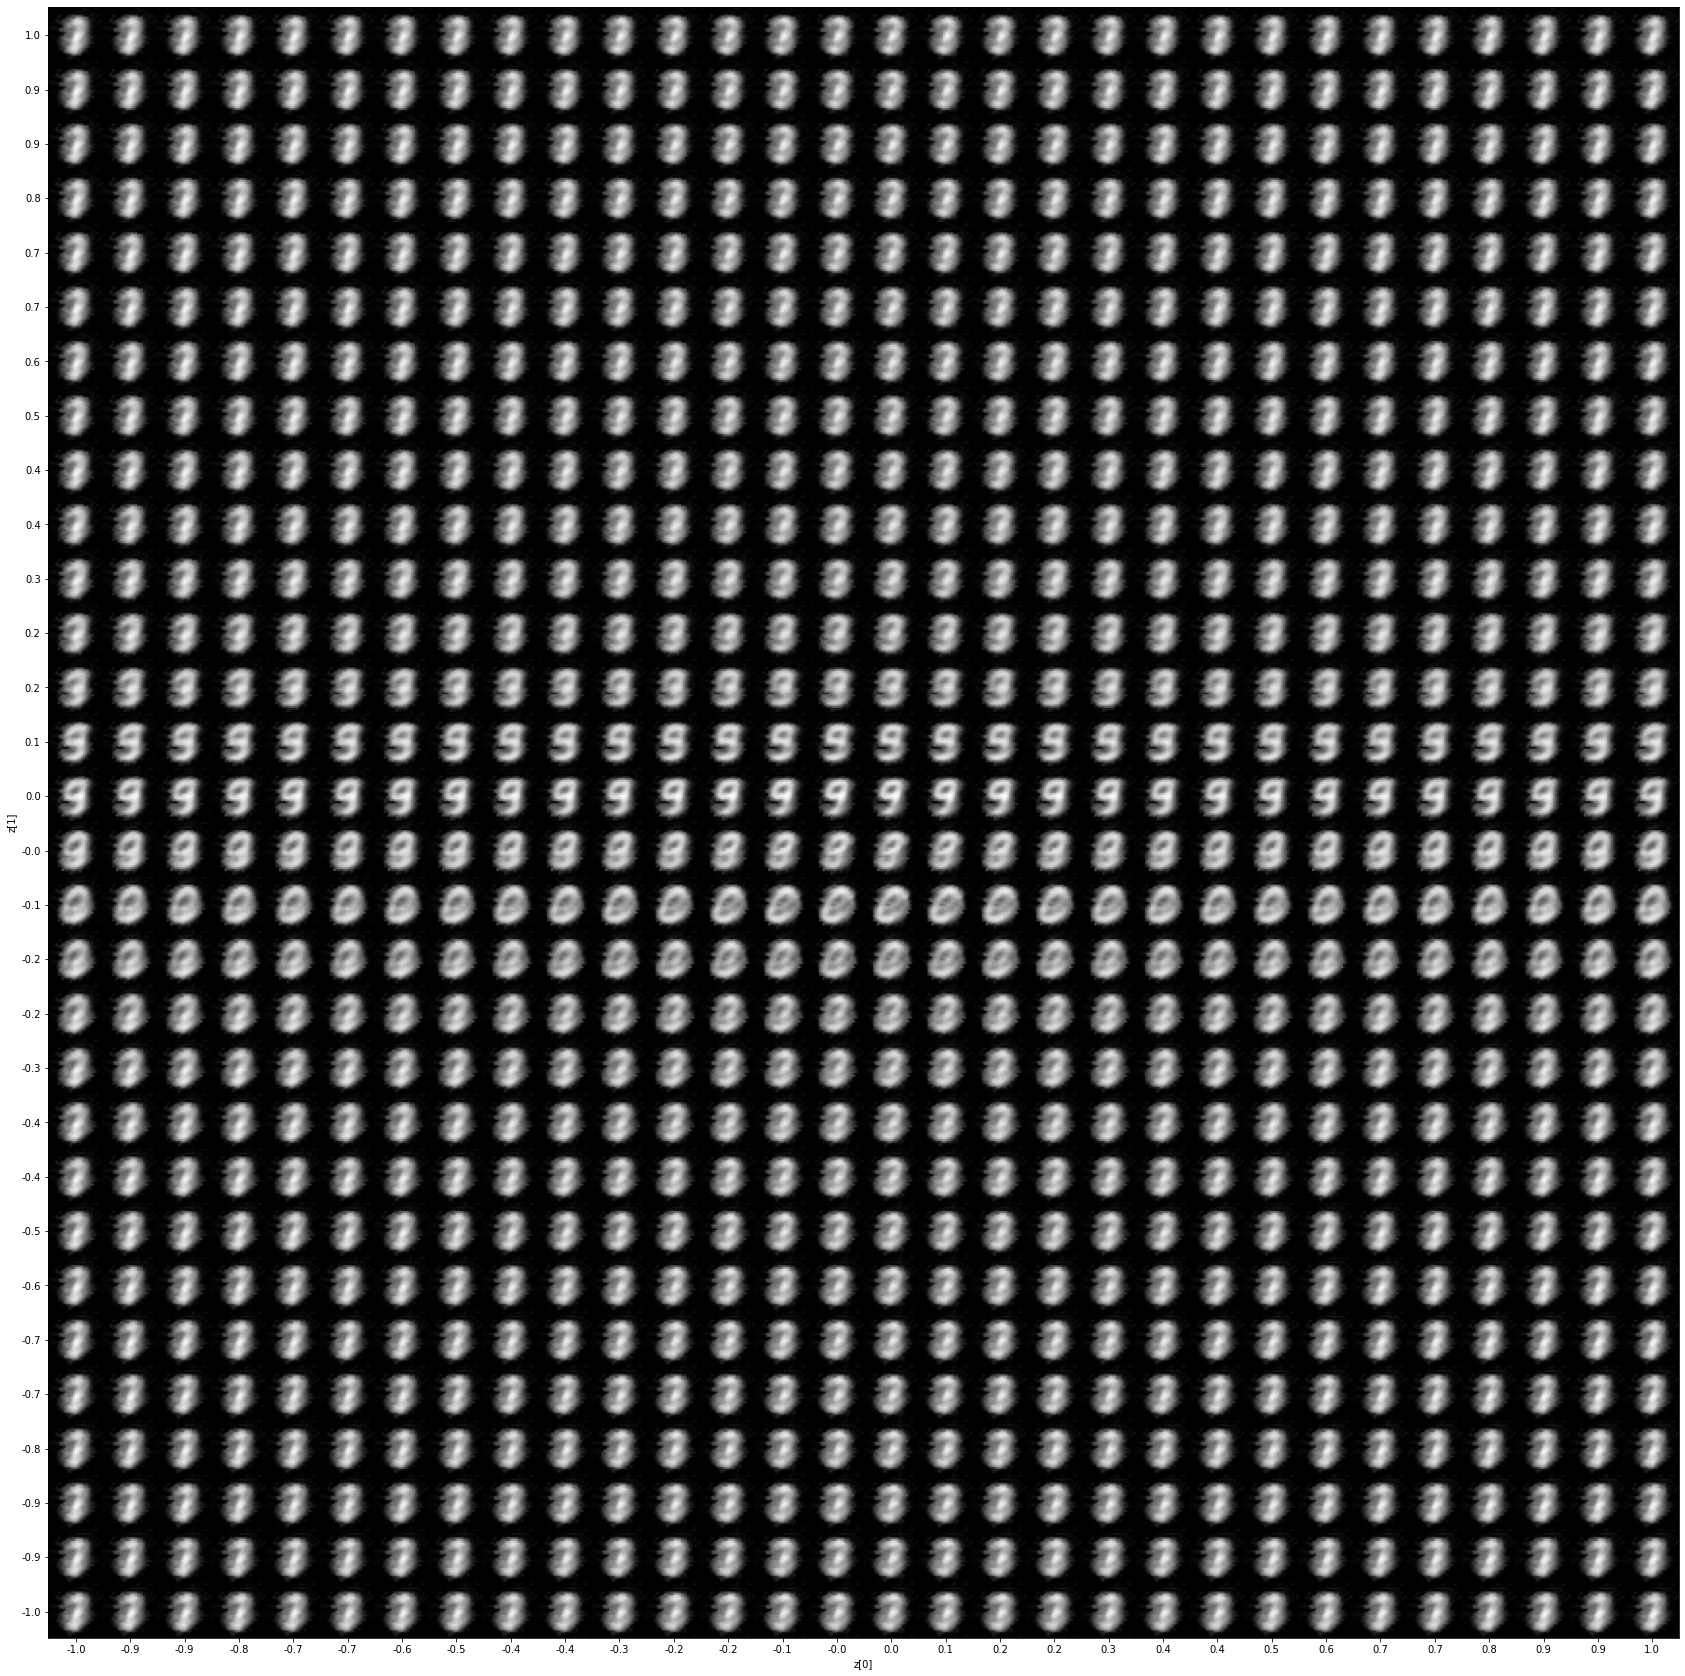

In [10]:
plot_latent_space(claDec)

2022-07-10 21:01:01.307931: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-10 21:01:01.377486: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.75GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-10 21:01:02.023564: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-10 21:01:03.104818: W tensorflow/core/common_runtime/bfc_allocato

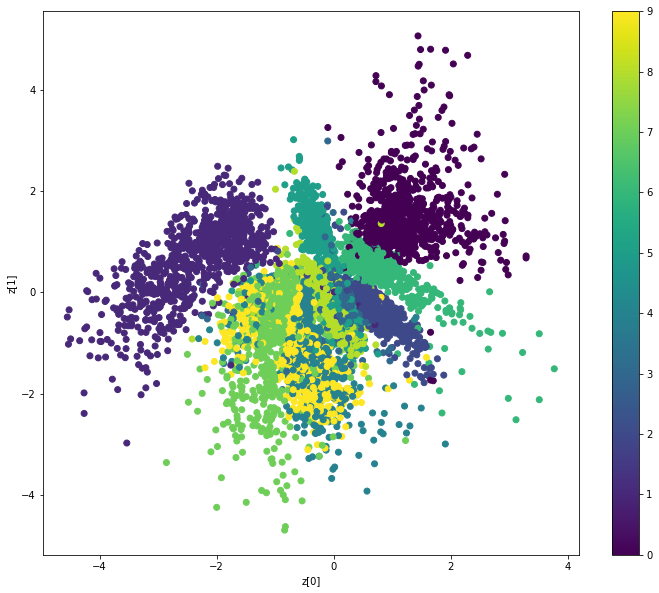

In [11]:
plot_label_clusters(refvae, train_images[:8000], train_labels[:8000])

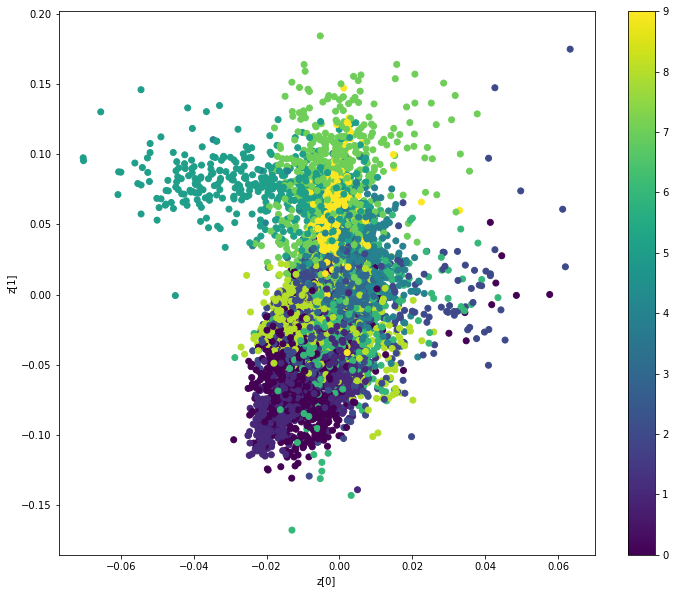

In [12]:
plot_label_clusters(claDec, train_images[:8000], train_labels[:8000])